In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame()

d = {}

with open("strong_scaling_results.csv", "r") as f:
    s, *threads = map(lambda x: x.strip(), f.readline().split(","))
    sizes = []
    times = []
    for line in f.readlines():
        size, *data = line.split(",")
        sizes.append(size)

        data = list(map(lambda x: x.split(", "),list(map(lambda x: x.strip().strip("[]") ,",".join(data).split("],[")))))

        temp = []
        for x in data:
            x = list(map(float, x))
            temp.append(x)
        
        times.append(temp)
        
    d = {
        "threads": list(map(int, threads)),
        "sizes": list(map(int, sizes)),
        "runs": len(times[0][0]),
        "times": times,
    }

print(d)
json.dump(d, open("strong_scaling.json", "w"))


{'threads': [1, 2, 4, 8, 16], 'sizes': [64, 128, 256, 512, 1024], 'runs': 20, 'times': [[[0.0497422, 0.0686142, 0.0480199, 0.048394, 0.0532906, 0.0550093, 0.0479535, 0.0554929, 0.0535988, 0.0488453, 0.0483993, 0.0479936, 0.0484142, 0.0485449, 0.0482314, 0.0488122, 0.0486501, 0.0487311, 0.048781, 0.048308], [0.0530362, 0.0500117, 0.0508753, 0.050162, 0.0510793, 0.0498562, 0.0508807, 0.05076, 0.0504555, 0.0494688, 0.0513929, 0.048996, 0.0512113, 0.0510262, 0.0513612, 0.0501124, 0.0505468, 0.0495187, 0.0502637, 0.0505014], [0.0468167, 0.0480649, 0.0459859, 0.0472711, 0.0456811, 0.0458411, 0.0471225, 0.0463036, 0.046584, 0.0452736, 0.0461141, 0.0449732, 0.0450472, 0.0448385, 0.0448898, 0.0429866, 0.0444593, 0.0435055, 0.0453229, 0.0432407], [0.0486576, 0.0475496, 0.0484721, 0.0459855, 0.0458947, 0.0447197, 0.0445502, 0.0438071, 0.0461447, 0.0430718, 0.0446466, 0.0441002, 0.0427084, 0.0423612, 0.0426872, 0.0415152, 0.0400451, 0.0423153, 0.0414158, 0.0425088], [0.0581461, 0.057358, 0.0589295

In [4]:
# save as json
json.dump(d, open("strong_scaling_results.json", "w"))

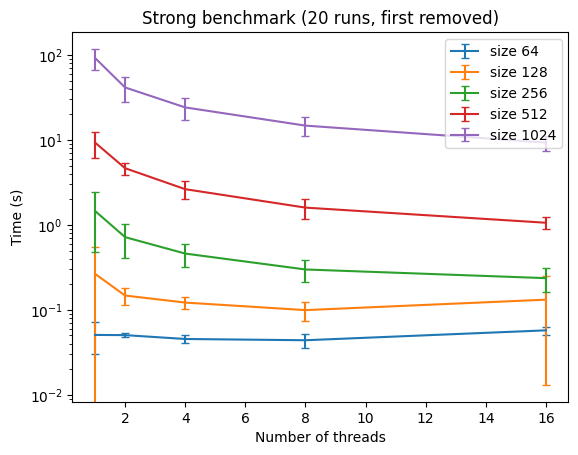

In [23]:
plt.Figure(figsize=(15, 10))

for i, size in enumerate(sizes):
    times_for_size = []

    for t in times[i]:
        times_for_size.append(t[1:])
        
    
    plt.errorbar(
        d["threads"],
        [sum(t) / len(t) for t in times_for_size],
        yerr=[max(t) - min(t) for t in times_for_size],
        label=f"size {size}",
        capsize=3,
    )

plt.xlabel("Number of threads")
plt.yscale("log")
plt.ylabel("Time (s)")
plt.legend()

plt.title(f"Strong benchmark ({d['runs']} runs, first removed)")

plt.savefig("strong_scaling_plot.pdf")

plt.show()